# Data description


What’s the best (or at least the most popular) Halloween candy? That was the question this dataset was collected to answer. Data was collected by creating a website where participants were shown presenting two fun-sized candies and asked to click on the one they would prefer to receive

## starting by importing our libraries

In [1]:
import pandas as pd #For DataFrames
import numpy as np #Mathmatical Operations
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting
%matplotlib inline
plt.style.use('seaborn')
sns.set()

In [2]:
df=pd.read_csv('candy-data.csv')

In [3]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
# meaning of each coulum 
# has afilln or not 

# EDA 

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


In [17]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [18]:
df.dropna(inplace=True)

# lests visulaize our data to undersatnd it better


In [8]:
def count(feature):
    
# using count plot to figure out the count of our observations in each type of filling (categorical varibles) )
    sns.countplot(x=feature,data=df)

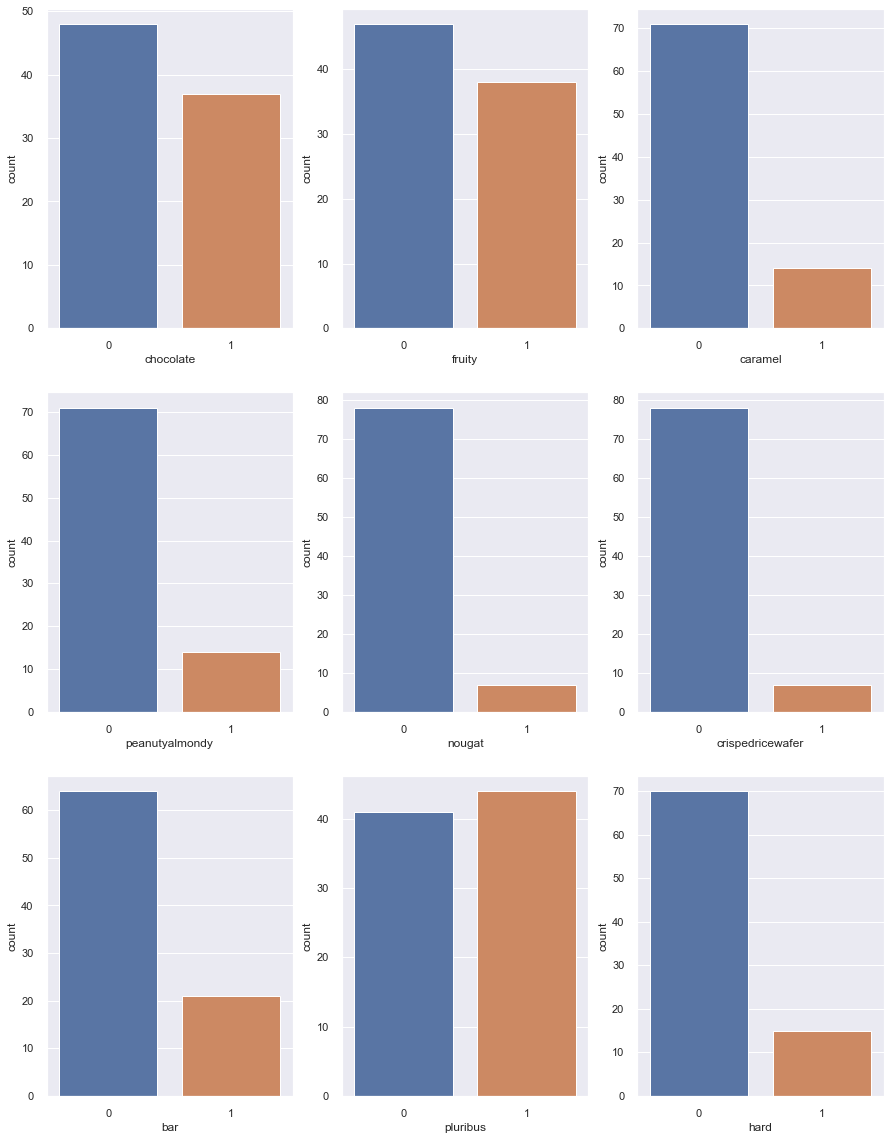

In [9]:
fig, ax = plt.subplots(3, 3,figsize=(15,20))
plt.subplot(3,3,1)
count('chocolate')
plt.subplot(3,3,2)
count('fruity')
plt.subplot(3,3,3)
count('caramel')
plt.subplot(3,3,4)
count('peanutyalmondy')
plt.subplot(3,3,5)
count('nougat')
plt.subplot(3,3,6)
count('crispedricewafer')
plt.subplot(3,3,7)
count('bar')
plt.subplot(3,3,8)
count('pluribus')
plt.subplot(3,3,9)
count('hard')

this show us does that type of candy has fillin or not we can see that 3 types are the most commen choclate , frity and plurbus

#### Before divie into buliding our logistic regression model we need to aplly feature selection and understand the relationship between our variables first 

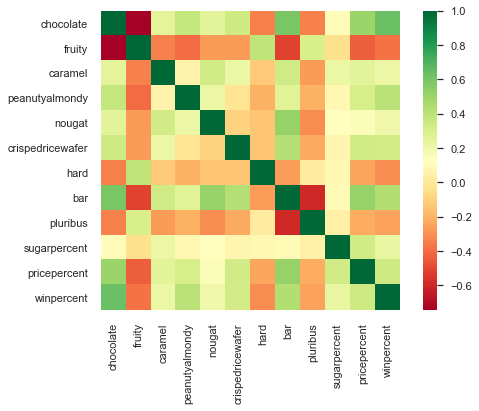

In [21]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

the heatmap shows us the corrlation between our variables as the color map on the right shows the green shades indecates positive correltion , that is mean the 2 variables increase togather or decrease togather , the red shades indecate the  opposite, thats mean one incrseas the other one decrease whice is calld nigitive corrlelation

lets take a look on the variables that corrlate with chocolate (our target variable)
* ( winpercent , bar , pricepercent , peanutyalmondy , crispedricewafer ) ,
are the most corrlated variables with chocolate respectively

In [26]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

### Feature selection

We willl use the chi-squared (chi²) statistical test as a statistical tests o select those features that have the strongest relationship with the output variable

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X =df.drop(['competitorname', 'chocolate'],axis=1) # our features (independant variables)
y=df['chocolate'] # our target (depandent)
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 11 best feature (all our feature are 11 so this is ranking)


               Specs       Score
10        winpercent  146.443081
0             fruity   25.857056
6                bar   22.842369
2     peanutyalmondy   10.135296
4   crispedricewafer    9.081081
5               hard    8.292042
3             nougat    5.067648
7           pluribus    4.730549
1            caramel    4.433076
9       pricepercent    3.725465
8       sugarpercent    0.152276


In [31]:
df.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

## Build our logistic regression model

In [48]:
#Train and test data
X=df.drop(['chocolate','competitorname','sugarpercent' ,'pricepercent','caramel','pluribus'],axis=1)# our feature
y=df['chocolate'] # our target 

In [49]:
#lets split our data into train and test sets by using the train_test_split modul
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test =train_test_split(X,y, test_size = 0.2 , random_state=4)

In [50]:
from sklearn.linear_model import LogisticRegression
# creating a model
log = LogisticRegression()
# feeding the training data to the model
log.fit(X_train,y_train)
# predicting the test set results
y_pred = log.predict(X_test)


## Evaluate our model

In [51]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.86      0.92         7

    accuracy                           0.94        17
   macro avg       0.95      0.93      0.94        17
weighted avg       0.95      0.94      0.94        17



In [52]:
confusion_matrix(y_test,y_pred)

array([[10,  0],
       [ 1,  6]], dtype=int64)

In [54]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9411764705882353
